In [17]:
import numpy as np
from matplotlib import pyplot as plt
# Core configuration & plotting settings
from qspectro2d.config import *  # provides CONFIG and mpl settings
from qspectro2d.core.atomic_system.system_class import AtomicSystem

from qspectro2d.config.paths import FIGURES_TESTS_DIR
name_plot_folder = "test_N_atoms_geometry"
custom_dir = FIGURES_TESTS_DIR / name_plot_folder

from plotstyle import COLORS, MARKERS, LINE_STYLES, FONT_SIZE, LATEX_DOC_WIDTH, set_size, save_fig, latex_available, format_sci_notation, init_style
init_style()

### Helper printing utilities
def show_basic_info(title: str, system):
    print(f"\n=== {title} ===")
    print(f"n_atoms: {system.n_atoms}")
    print("frequencies (cm^-1):", system.frequencies_cm)
    print("dip moments:", system.dip_moments)
    if system.n_atoms <= 12:
        print("Hamiltonian matrix (fs^-1 units / ħ incorporated):")
        print(system.hamiltonian.tidyup().full().real)
    print("Eigenvalues (fs^-1):", system.eigenstates[0])

In [18]:
### 1. Single atom system
single = AtomicSystem(n_atoms=1, frequencies_cm=[16000.0], dip_moments=[1.0])
show_basic_info("Single Atom", single)


=== Single Atom ===
n_atoms: 1
frequencies (cm^-1): [16000.0]
dip moments: [1.0]
Hamiltonian matrix (fs^-1 units / ħ incorporated):
[[0.         0.        ]
 [0.         3.01391833]]
Eigenvalues (fs^-1): [0.         3.01391833]


In [19]:
### 2. Dimer with coupling
# Simple two-site system with modest detuning and coupling
dimer1 = AtomicSystem(
    n_atoms=2,
    max_excitation=1,  # single-excitation manifold
    frequencies_cm=[16500.0, 15650.0],
    dip_moments=[1.0, 1.2],
    coupling_cm=10.0,)
show_basic_info("Dimer (2 atoms {1})", dimer1)

### 2. Dimer with coupling
# Simple two-site system with modest detuning and coupling
dimer2 = AtomicSystem(
    n_atoms=2,
    max_excitation=2,  # double-excitation manifold
    frequencies_cm=[16500.0, 15650.0],
    dip_moments=[1.0, 1.112],
    coupling_cm=10.0,
)
show_basic_info("Dimer (2 atoms {2})", dimer2)


=== Dimer (2 atoms {1}) ===
n_atoms: 2
frequencies (cm^-1): [16500.0, 15650.0]
dip moments: [1.0, 1.2]
Hamiltonian matrix (fs^-1 units / ħ incorporated):
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.10810328e+00 2.26043875e-03]
 [0.00000000e+00 2.26043875e-03 2.94798886e+00]]
Eigenvalues (fs^-1): [0.         2.94795696 3.10813518]

=== Dimer (2 atoms {2}) ===
n_atoms: 2
frequencies (cm^-1): [16500.0, 15650.0]
dip moments: [1.0, 1.112]
Hamiltonian matrix (fs^-1 units / ħ incorporated):
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.10810328e+00 2.09467324e-03 0.00000000e+00]
 [0.00000000e+00 2.09467324e-03 2.94798886e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.05609214e+00]]
Eigenvalues (fs^-1): [0.         2.94796147 3.10813067 6.05609214]


In [20]:
### 3 atoms
three_at = AtomicSystem(n_atoms=3,
                        frequencies_cm=[16000.0, 16500.0, 17000.0],
                        dip_moments=[1.0, 1.0, 1.0],
                        max_excitation=2,  # double-excitation manifold
                        coupling_cm=200.0)
show_basic_info("Three Atoms", three_at)
three_at.coupling_matrix_cm


=== Three Atoms ===
n_atoms: 3
frequencies (cm^-1): [16000.0, 16500.0, 17000.0]
dip moments: [1.0, 1.0, 1.0]
Hamiltonian matrix (fs^-1 units / ħ incorporated):
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.01391833e+00 3.76739791e-02 4.70924739e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.76739791e-02 3.10810328e+00 3.76739791e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.70924739e-03 3.76739791e-02 3.20228822e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.12202160e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 6.21620655e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 6.31039150e+00]]
Eigenvalues (fs^-1): [0.         3.00036488 3.10696367 3.21698127 6.

array([[  0., 200.,  25.],
       [200.,   0., 200.],
       [ 25., 200.,   0.]])

In [21]:
### 3. 5-atom system (single-excitation manifold) with dipole-dipole coupling
five_at = AtomicSystem(
    n_atoms=5,
    frequencies_cm=[16000 + 5*i for i in range(5)],
    dip_moments=[1.0]*5,
    coupling_cm=300.0,
    max_excitation=1,
)
show_basic_info("5-Atom Dipole-Dipole Coupling", five_at)
mat = five_at.coupling_matrix_cm
print("Coupling matrix (cm^-1):\n", mat)
### 4. 12-atom cylindrical geometry (2 chains x 3 rings) with 1/r^3 couplings
cyl1 = AtomicSystem(
    n_atoms=12,
    n_chains=2,  # 3 rings, 2 chains
    frequencies_cm=[16000.0]*12,
    dip_moments=[1.0]*12,
    coupling_cm=200.0,  # used as default prefactor if not specified
)
# Place on cylinder and build couplings
show_basic_info("Cylindrical Geometry (12 atoms)", cyl1)
print("Positions (arbitrary units):\n", cyl1.positions)
print("Coupling matrix (cm^-1):\n", cyl1.coupling_matrix_cm)


=== 5-Atom Dipole-Dipole Coupling ===
n_atoms: 5
frequencies (cm^-1): [16000, 16005, 16010, 16015, 16020]
dip moments: [1.0, 1.0, 1.0, 1.0, 1.0]
Hamiltonian matrix (fs^-1 units / ħ incorporated):
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.01391833e+00 5.65109687e-02 7.06387108e-03
  2.09299884e-03 8.82983885e-04]
 [0.00000000e+00 5.65109687e-02 3.01486018e+00 5.65109687e-02
  7.06387108e-03 2.09299884e-03]
 [0.00000000e+00 7.06387108e-03 5.65109687e-02 3.01580203e+00
  5.65109687e-02 7.06387108e-03]
 [0.00000000e+00 2.09299884e-03 7.06387108e-03 5.65109687e-02
  3.01674388e+00 5.65109687e-02]
 [0.00000000e+00 8.82983885e-04 2.09299884e-03 7.06387108e-03
  5.65109687e-02 3.01768573e+00]]
Eigenvalues (fs^-1): [0.         2.92503817 2.95733032 3.00687159 3.06633465 3.1234354 ]
Coupling matrix (cm^-1):
 [[  0.         300.          37.5         11.11111111   4.6875    ]
 [300.           0.         300.          37.5   

C:\Users\leopo\Documents\Projects\2025_master_thesis_leopold_bodamer\code\python\plotstyle\style.py:140: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.savefig(


[WindowsPath('C:/Users/leopo/Documents/Projects/2025_master_thesis_leopold_bodamer/figures/figures_from_python/tests/test_N_atoms_geometry/cylindrical_positions.png')]

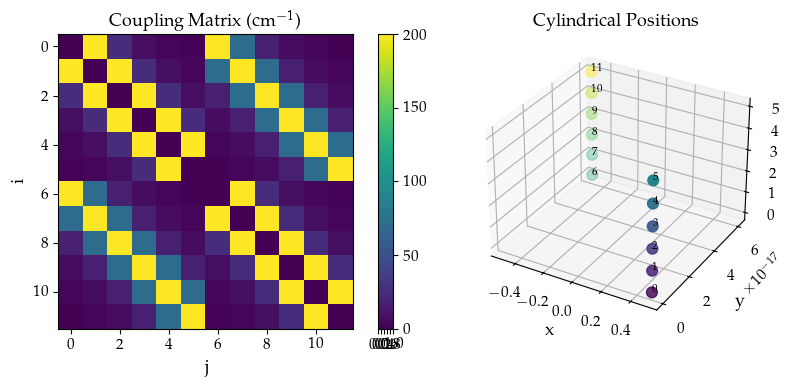

In [22]:
### Visualization: Coupling matrix heatmap & 3D positions
fig = plt.figure(figsize=(12,4))

# Coupling matrix heatmap
ax1 = fig.add_subplot(1,2,1)
im = ax1.imshow(cyl1.coupling_matrix_cm, cmap='viridis')
ax1.set_title("Coupling Matrix (cm$^{-1}$)")
ax1.set_xlabel("j")
ax1.set_ylabel("i")
plt.colorbar(im, ax=ax1, fraction=0.046, pad=0.04)

# 3D positions
ax2 = fig.add_subplot(1,2,2, projection='3d')
pos = cyl1.positions
ax2.scatter(pos[:,0], pos[:,1], pos[:,2], c=np.arange(len(pos)), cmap='viridis', s=60)
for idx, (x,y,z) in enumerate(pos):
    ax2.text(x, y, z, f"{idx}", fontsize=8)
ax2.set_title("Cylindrical Positions")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
save_fig(fig, custom_dir / "cylindrical_positions")

[WindowsPath('C:/Users/leopo/Documents/Projects/2025_master_thesis_leopold_bodamer/figures/figures_from_python/tests/test_N_atoms_geometry/eigen_spectrum_single_excitation.png')]

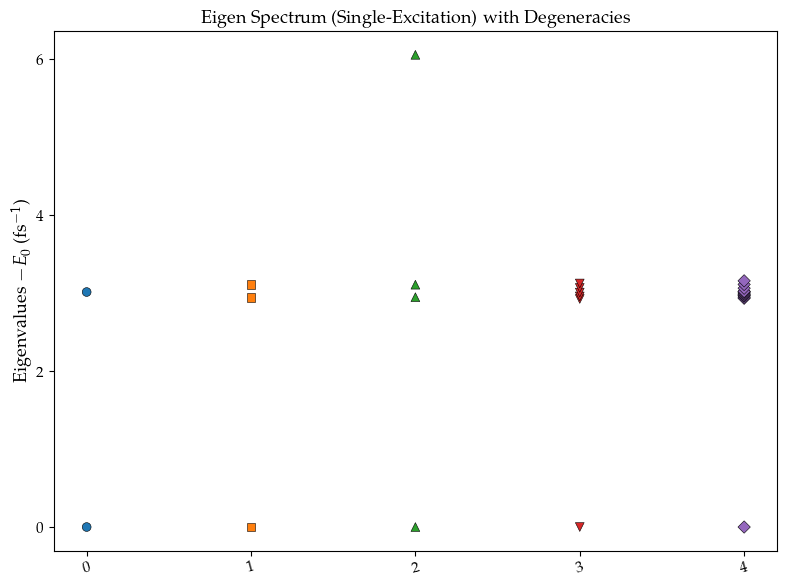

In [25]:
### 5. Energy spectrum comparison plot (eigenvalues with degeneracy)
# Assemble systems in an ordered mapping for automatic iteration
from numpy import save


systems_map = {
    "1 atom": single,
    "dimer1": dimer1,
    "dimer2": dimer2,
    "5 atoms": five_at,
    "12 cyl1": cyl1,
}

# Group nearly-equal eigenvalues (degeneracy) helper
def group_levels(evals: np.ndarray, atol: float = 1e-10):
    vals_sorted = np.sort(evals)
    uniq = []
    counts = []
    for e in vals_sorted:
        if not uniq or abs(e - uniq[-1]) > atol:
            uniq.append(e)
            counts.append(1)
        else:
            counts[-1] += 1
    return np.array(uniq), np.array(counts)

plt.figure()
handles = []
for x, (label, sys) in enumerate(systems_map.items()):
    evals = sys.eigenstates[0]
    evals_shift = evals - evals.min()  # shift so ground level = 0
    uniq, counts = group_levels(evals_shift)

    color     = COLORS[x % len(COLORS)]
    marker    = MARKERS[x % len(MARKERS)]

    # Marker size encodes degeneracy
    sizes = 40 + 70*(counts-1)  # base size + additive per extra state
    plt.scatter(
        np.full_like(uniq, x, dtype=float),
        uniq,
        s=sizes,
        color=color,
        marker=marker,
        edgecolors='k',
        linewidths=0.4,
        label=label,
        zorder=3,
    )

    # Annotate degeneracy if >1; small horizontal jitter for readability
    for u, cnt in zip(uniq, counts):
        if cnt > 1:
            plt.text(x + 0.08, u, f"×{cnt}", va='center', ha='left', fontsize=8)

plt.ylabel(r'Eigenvalues $- E_0$ (fs$^{-1}$)')
plt.xticks(range(len(systems_map)), list(systems_map.keys()), rotation=15)
plt.title('Eigen Spectrum (Single-Excitation) with Degeneracies')
plt.grid(False)
plt.legend(handles=handles, frameon=False, ncol=len(systems_map))
save_fig(plt.gcf(), custom_dir / "eigen_spectrum_single_excitation")


=== Cylindrical Geometry (30 atoms) ===
n_atoms: 30
frequencies (cm^-1): [16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0, 16000.0]
dip moments: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Eigenvalues (fs^-1): [0.         3.0055938  3.00582841 3.00621318 3.00673868 3.00739163
 3.00815482 3.00886162 3.00900707 3.00923801 3.0098618  3.00992312
 3.01072745 3.01087368 3.01182549 3.01182702 3.01274157 3.01314938
 3.01358176 3.01430363 3.01468014 3.0148642  3.01522292 3.01639992
 3.01828413 3.02029911 3.02240151 3.02452895 3.02659742 3.02847348
 3.02995595]
Positions (arbitrary units):
 [[ 5.000000e-01  0.000000e+00  0.000000e+00]
 [ 5.000000e-01  0.000000e+00  1.000000e+00]
 [

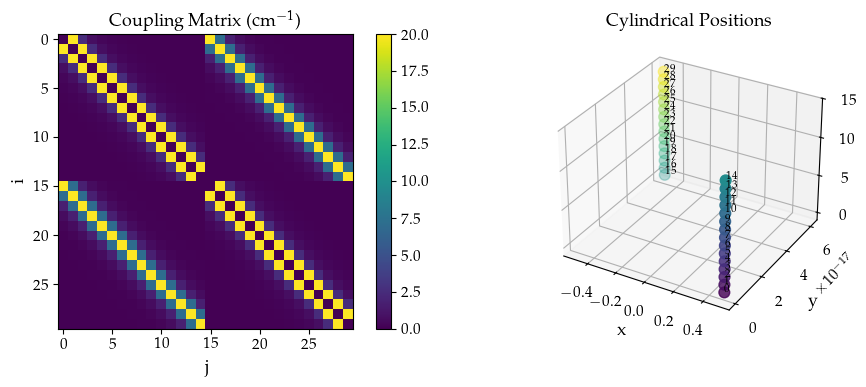

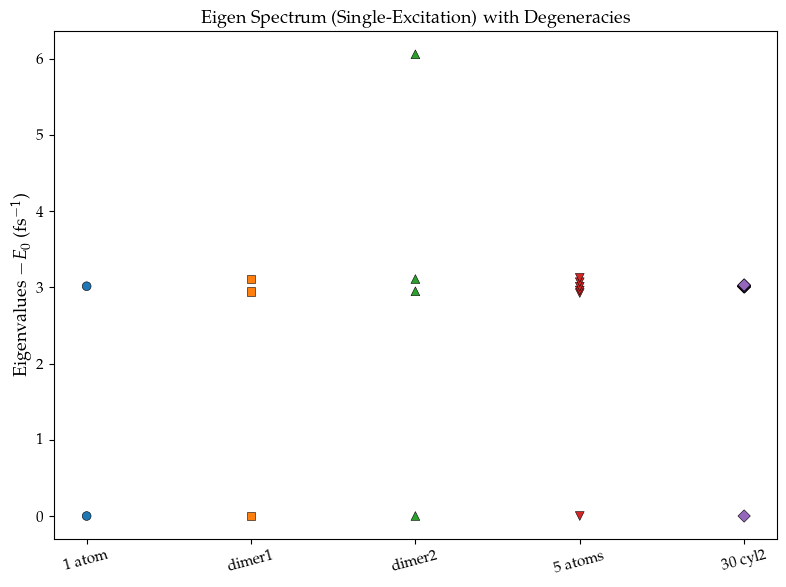

In [24]:
### 4. 12-atom cylindrical geometry (2 chains x 3 rings) with 1/r^3 couplings
cyl2 = AtomicSystem(
    n_atoms=30,
    n_chains=2,  # 6 rings, 2 chains
    frequencies_cm=[16000.0]*30,
    dip_moments=[1.0]*30,
    max_excitation=1,
    coupling_cm=20.0,  # used as default prefactor if not specified
)
# Place on cylinder and build couplings
show_basic_info("Cylindrical Geometry (30 atoms)", cyl2)
print("Positions (arbitrary units):\n", cyl2.positions)
mat = cyl2.coupling_matrix_cm
print("Coupling matrix (cm^-1):\n", mat)

### Visualization: Coupling matrix heatmap & 3D positions
fig = plt.figure(figsize=(12,4))

# Coupling matrix heatmap
ax1 = fig.add_subplot(1,2,1)
im = ax1.imshow(mat, cmap='viridis')
ax1.set_title("Coupling Matrix (cm$^{-1}$)")
ax1.set_xlabel("j")
ax1.set_ylabel("i")
plt.colorbar(im, ax=ax1, fraction=0.046, pad=0.04)

# 3D positions
ax2 = fig.add_subplot(1,2,2, projection='3d')
pos = cyl2.positions
ax2.scatter(pos[:,0], pos[:,1], pos[:,2], c=np.arange(len(pos)), cmap='viridis', s=60)
for idx, (x,y,z) in enumerate(pos):
    ax2.text(x, y, z, f"{idx}", fontsize=8)
ax2.set_title("Cylindrical Positions")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
plt.tight_layout()
plt.show()

### 5. Energy spectrum comparison plot (eigenvalues with degeneracy)
# =============================
# DEGENERACY-AWARE PLOT (auto-configured: no manual systems/labels/colors lists)
# =============================
# Assemble systems in an ordered mapping for automatic iteration
systems_map = {
    "1 atom": single,
    "dimer1": dimer1,
    "dimer2": dimer2,
    "5 atoms": five_at,
    "30 cyl2": cyl2,
}

# Group nearly-equal eigenvalues (degeneracy) helper
def group_levels(evals: np.ndarray, atol: float = 1e-10):
    vals_sorted = np.sort(evals)
    uniq = []
    counts = []
    for e in vals_sorted:
        if not uniq or abs(e - uniq[-1]) > atol:
            uniq.append(e)
            counts.append(1)
        else:
            counts[-1] += 1
    return np.array(uniq), np.array(counts)

plt.figure()

handles = []
for x, (label, sys) in enumerate(systems_map.items()):
    evals = sys.eigenstates[0]
    evals_shift = evals - evals.min()  # shift so ground level = 0
    uniq, counts = group_levels(evals_shift)

    color     = COLORS[x % len(COLORS)]
    marker    = MARKERS[x % len(MARKERS)]

    # Marker size encodes degeneracy
    sizes = 40 + 70*(counts-1)  # base size + additive per extra state
    plt.scatter(
        np.full_like(uniq, x, dtype=float),
        uniq,
        s=sizes,
        color=color,
        marker=marker,
        edgecolors='k',
        linewidths=0.4,
        label=label,
        zorder=3,
    )

    # Annotate degeneracy if >1; small horizontal jitter for readability
    for u, cnt in zip(uniq, counts):
        if cnt > 1:
            plt.text(x + 0.08, u, f"×{cnt}", va='center', ha='left', fontsize=8)

plt.ylabel(r'Eigenvalues $- E_0$ (fs$^{-1}$)')
plt.xticks(range(len(systems_map)), list(systems_map.keys()), rotation=15)
plt.title('Eigen Spectrum (Single-Excitation) with Degeneracies')
plt.grid(False)
plt.legend(handles=handles, frameon=False, ncol=len(systems_map))
plt.tight_layout()
plt.show()

In [4]:
from qutip import *
from qspectro2d.core.simulation import SimulationConfig, SimulationModuleOQS
def R_paper(sim_oqs: SimulationModuleOQS) -> Qobj:
    """Dispatcher selecting appropriate implementation based on n_atoms."""
    n_atoms = sim_oqs.system.n_atoms
    if n_atoms == 1:
        return _R_paper_1atom(sim_oqs)
    if n_atoms == 2:
        return _R_paper_2atom(sim_oqs)
    raise ValueError("Only n_atoms=1 or 2 are supported.")


def _R_paper_1atom(sim_oqs: SimulationModuleOQS) -> Qobj:
    """Redfield tensor for a single 2-level system."""
    from qspectro2d.core.bath_system.bath_fcts import bath_to_rates

    size = 2
    idx_00 = stacked_index(size, 0, 0)
    idx_01 = stacked_index(size, 0, 1)
    idx_10 = stacked_index(size, 1, 0)
    idx_11 = stacked_index(size, 1, 1)

    w0 = sim_oqs.system.frequencies[0]
    deph_rate_pure = bath_to_rates(sim_oqs.bath, mode="deph")
    down_rate, up_rate = bath_to_rates(sim_oqs.bath, w0, mode="decay")
    deph_rate_tot = deph_rate_pure + 0.5 * (down_rate + up_rate)

    R = np.zeros((size * size, size * size), dtype=complex)
    R[idx_10, idx_10] = -deph_rate_tot
    R[idx_01, idx_01] = -deph_rate_tot
    R[idx_00, idx_00] = -up_rate
    R[idx_00, idx_11] = down_rate
    R[idx_11, idx_00] = up_rate
    R[idx_11, idx_11] = -down_rate
    return Qobj(R, dims=[[[2], [2]], [[2], [2]]])

def _R_paper_2atom(sim_oqs: SimulationModuleOQS) -> Qobj:
    """Redfield tensor for a coupled dimer (n_atoms=2)."""
    size = 4
    idx_00 = stacked_index(size, 0, 0)
    idx_01 = stacked_index(size, 0, 1)
    idx_02 = stacked_index(size, 0, 2)
    idx_03 = stacked_index(size, 0, 3)
    idx_10 = stacked_index(size, 1, 0)
    idx_11 = stacked_index(size, 1, 1)
    idx_12 = stacked_index(size, 1, 2)
    idx_13 = stacked_index(size, 1, 3)
    idx_20 = stacked_index(size, 2, 0)
    idx_21 = stacked_index(size, 2, 1)
    idx_22 = stacked_index(size, 2, 2)
    idx_23 = stacked_index(size, 2, 3)
    idx_30 = stacked_index(size, 3, 0)
    idx_31 = stacked_index(size, 3, 1)
    idx_32 = stacked_index(size, 3, 2)
    idx_33 = stacked_index(size, 3, 3)

    R = np.zeros((size * size, size * size), dtype=complex)
    omega_laser = sim_oqs.laser.omega_laser

    # One-excitation coherences
    term = -1j * (
        sim_oqs.system.omega_ij(1, 0) - omega_laser
    ) - sim_oqs.sb_coupling.Gamma_big_ij(1, 0)
    R[idx_10, idx_10] = term
    R[idx_01, idx_01] = np.conj(term)
    term = -1j * (
        sim_oqs.system.omega_ij(2, 0) - omega_laser
    ) - sim_oqs.sb_coupling.Gamma_big_ij(2, 0)
    R[idx_20, idx_20] = term
    R[idx_02, idx_02] = np.conj(term)

    # Double-excited coherences
    term = -1j * (
        sim_oqs.system.omega_ij(3, 0) - 2 * omega_laser
    ) - sim_oqs.sb_coupling.Gamma_big_ij(3, 0)
    R[idx_30, idx_30] = term
    R[idx_03, idx_03] = np.conj(term)

    # Cross-coherences
    term = -1j * sim_oqs.system.omega_ij(1, 2) - sim_oqs.sb_coupling.Gamma_big_ij(1, 2)
    R[idx_12, idx_12] = term
    R[idx_21, idx_21] = np.conj(term)
    term = -1j * (
        sim_oqs.system.omega_ij(3, 1) - omega_laser
    ) - sim_oqs.sb_coupling.Gamma_big_ij(3, 1)
    R[idx_31, idx_31] = term
    R[idx_13, idx_13] = np.conj(term)
    term = -1j * (
        sim_oqs.system.omega_ij(3, 2) - omega_laser
    ) - sim_oqs.sb_coupling.Gamma_big_ij(3, 2)
    R[idx_32, idx_32] = term
    R[idx_23, idx_23] = np.conj(term)

    # Populations
    R[idx_11, idx_11] = -sim_oqs.sb_coupling.Gamma_big_ij(1, 1)
    R[idx_11, idx_22] = sim_oqs.sb_coupling.gamma_small_ij(1, 2)
    R[idx_22, idx_22] = -sim_oqs.sb_coupling.Gamma_big_ij(2, 2)
    R[idx_22, idx_11] = sim_oqs.sb_coupling.gamma_small_ij(2, 1)
    R[idx_33, :] = -R[idx_00, :] - R[idx_11, :] - R[idx_22, :]

    return Qobj(R, dims=[[[2, 2], [2, 2]], [[2, 2], [2, 2]]])


In [1]:
from types import SimpleNamespace
import numpy as np
from qutip import Qobj, stacked_index
from qspectro2d.core.simulation.redfield import R_paper
from qspectro2d.utils.simulation_utils import create_base_sim_oqs

args = SimpleNamespace(t_coh=5.0, t_wait=0.0, t_det_max=10.0, dt=0.5)

sim_oqs, time_cut = create_base_sim_oqs(args)
print(R_paper(sim_oqs))

size = 2
idx_00 = stacked_index(size, 0, 0)
idx_01 = stacked_index(size, 0, 1)
idx_10 = stacked_index(size, 1, 0)
idx_11 = stacked_index(size, 1, 1)
print(idx_00, idx_01, idx_10, idx_11)
R = np.zeros((size * size, size * size), dtype=complex)

🔧 Creating base simulation configuration...
🔎 Validating configuration...
🔍 Validating solver...
############################################################
✅ Solver validation worked: Evolution becomes unphysical at (inf × t_max)
Quantum object: dims=[[[2], [2]], [[2], [2]]], shape=(4, 4), type='super', dtype=Dense, isherm=False
Qobj data =
[[-1.77536285  0.          0.          1.7771391 ]
 [ 0.         -3.57035342  0.          0.        ]
 [ 0.          0.         -3.57035342  0.        ]
 [ 1.77536285  0.          0.         -1.7771391 ]]
0 2 1 3


In [1]:
from types import SimpleNamespace
import numpy as np
from qutip import Qobj, stacked_index
from qspectro2d.core.simulation.redfield import R_paper
from qspectro2d.utils.simulation_utils import create_base_sim_oqs

args = SimpleNamespace(t_coh=5.0, t_wait=0.0, t_det_max=10.0, dt=0.5)

sim_oqs, time_cut = create_base_sim_oqs(args)
print(R_paper(sim_oqs))

size = 2
idx_00 = stacked_index(size, 0, 0)
idx_01 = stacked_index(size, 0, 1)
idx_10 = stacked_index(size, 1, 0)
idx_11 = stacked_index(size, 1, 1)
print(idx_00, idx_01, idx_10, idx_11)
R = np.zeros((size * size, size * size), dtype=complex)

🔧 Creating base simulation configuration...
🔎 Validating configuration...
🔍 Validating solver...
############################################################
✅ Solver validation worked: Evolution becomes unphysical at (inf × t_max)
Quantum object: dims=[[[2], [2]], [[2], [2]]], shape=(4, 4), type='super', dtype=Dense, isherm=False
Qobj data =
[[ -6.70517069   0.           0.           6.71187922]
 [  0.         -13.48447114   0.           0.        ]
 [  0.           0.         -13.48447114   0.        ]
 [  6.70517069   0.           0.          -6.71187922]]
0 2 1 3


In [ ]:
w0 = sim_oqs.system.frequencies[0]
Sw0 = sim_oqs.decay_channels[0][1].power_spectrum(w0)


0
